# Cluster by position

The goal of this project is to use a clustering machine learning model on a dataset filled with personal statistics gathered from hundereds of Premier League players in order to hopefully see clusters made of players from different positions. With [this dataset](https://gist.github.com/masterofpun/f415cbae73c01c82a45e3a44b7189520) I'll try to find goalkeepers, central defenders, wide defenders, center midfielders, wide midfielders, wide forwards, and center forwards (7 clusters).

In [435]:
import pandas as pd

In [436]:
df = pd.read_csv('player_data.csv')

In [437]:
#Here you can see the dataset in its entirety 

df

,id,dob,name,nationality,height,weight,wins,fouls,goals,losses,...,last_man_tackle,clearance_off_line,saves,punches,goal_kicks,penalty_save,keeper_throws,good_high_claim,total_keeper_sweeper,stand_catch_dive_catch
0,3452,1990-11-26,Danny Welbeck,England,185cm,73kg,87,89,0.22,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001,1994-12-01,Emre Can,Germany,184cm,82kg,29,68,0.03,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4805,1985-08-20,Álvaro Negredo,Spain,186cm,86kg,23,32,0.26,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13194,1996-12-31,Jordan Lee,England,178cm,80kg,0,0,0.00,0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4911,1992-11-05,Thibaut Courtois,Belgium,199cm,91kg,32,3,0.00,10,...,NaN,NaN,151.0,31.0,429,1.0,281,108.0,33.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,4112,1994-01-15,Eric Dier,England,188cm,88kg,36,76,0.07,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,13866,1999-04-24,Jonathan Leko,England,182cm,75kg,0,7,9.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,7120,1994-02-13,Memphis Depay,Netherlands,176cm,78kg,15,21,0.06,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,4810,1990-05-01,Leroy Fer,Netherlands,188cm,79kg,20,110,0.17,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately I can clearly see that the goals feature is inaccurate in some way, since it is impossible to score a deicmal fraction of goals. Hence I will habe to remove it.

In [438]:
df.drop(['goals'],inplace=True,axis=1)

Here I seperate the players' match statistics from their personal information so than I can use their match statistics to make the clusers and also be able to see their names after the clusters are created.

In [439]:
stats = df.iloc[:,4:]
player = df.iloc[:,:4]

In [440]:
#Here I transform all of the information into a datatype I can use
stats = stats.replace('[^\d.]','', regex=True).astype(float)

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In order to start cleaning the data I'll first explore the data by seeing how much if any data is missing.

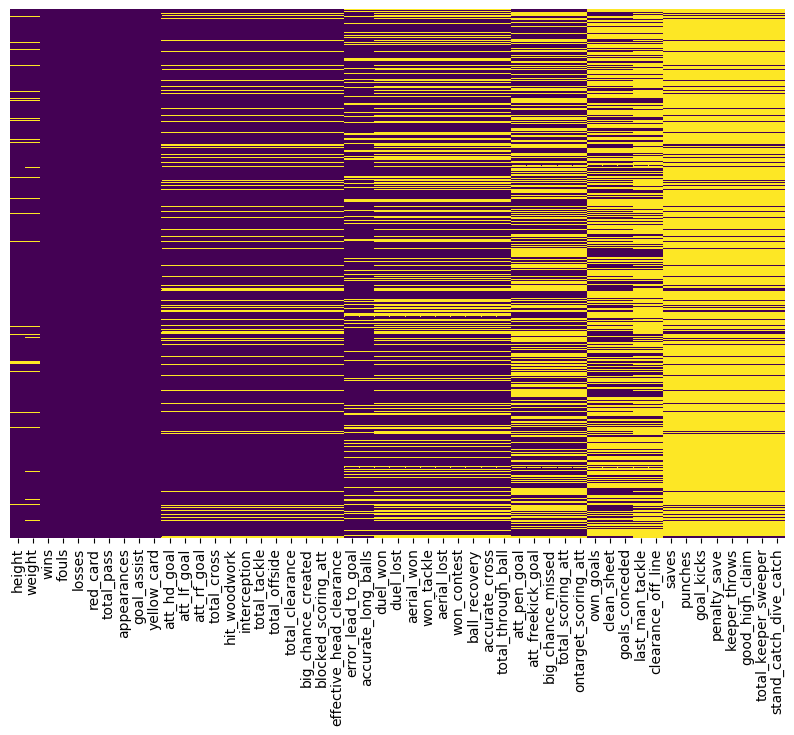

In [442]:
fig = plt.figure(figsize=(10,7), dpi=100)
sns.heatmap(stats.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here we can see that the goalkeeper stats for what seems to be non-goalies is filled in as Nan values. I will seperate the players with values in these features from the rest and will hopefully see only goalkeepers.

In [443]:
outfield = stats[stats['goal_kicks'].isna()]
outfield = outfield.iloc[:,:-8]
goalies = stats[stats['goal_kicks'].notna()]

In [444]:
merged = player.merge(goalies, left_index=True, right_index=True)

In [445]:
merged

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,last_man_tackle,clearance_off_line,saves,punches,goal_kicks,penalty_save,keeper_throws,good_high_claim,total_keeper_sweeper,stand_catch_dive_catch
4,4911,1992-11-05,Thibaut Courtois,Belgium,199.0,91.0,32.0,3.0,10.0,2.0,...,NaN,NaN,151.0,31.0,429.0,1.0,281.0,108.0,33.0,26.0
7,4401,1978-11-16,Gerhard Tremmel,Germany,190.0,86.0,7.0,0.0,15.0,0.0,...,NaN,NaN,92.0,24.0,234.0,0.0,131.0,32.0,3.0,10.0
10,3558,1984-09-09,Brad Guzan,United States,193.0,94.0,32.0,3.0,80.0,0.0,...,NaN,NaN,441.0,80.0,1319.0,2.0,551.0,324.0,84.0,63.0
33,19600,1993-06-22,Loris Karius,Germany,189.0,75.0,2.0,0.0,0.0,0.0,...,NaN,NaN,2.0,0.0,10.0,0.0,5.0,1.0,0.0,1.0
45,4726,1985-05-03,David Marshall,Scotland,191.0,83.0,7.0,0.0,24.0,0.0,...,NaN,NaN,165.0,9.0,413.0,0.0,171.0,64.0,20.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3732,1992-06-17,Ryan Allsop,England,186.0,87.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0
545,1870,1983-01-27,Lee Grant,England,193.0,83.0,0.0,0.0,0.0,0.0,...,NaN,NaN,10.0,0.0,22.0,0.0,6.0,2.0,4.0,1.0
548,15111,1998-02-10,Alfie Whiteman,England,189.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,4319,1987-01-02,Costel Pantilimon,Romania,203.0,96.0,14.0,2.0,22.0,0.0,...,NaN,NaN,197.0,22.0,496.0,0.0,198.0,95.0,52.0,28.0


Above we see a dataframe with only goalkeepers. Hence I've been able to find goalkeepers via exploratory data analysis. I've also seperated the outfield players into their own dataframe

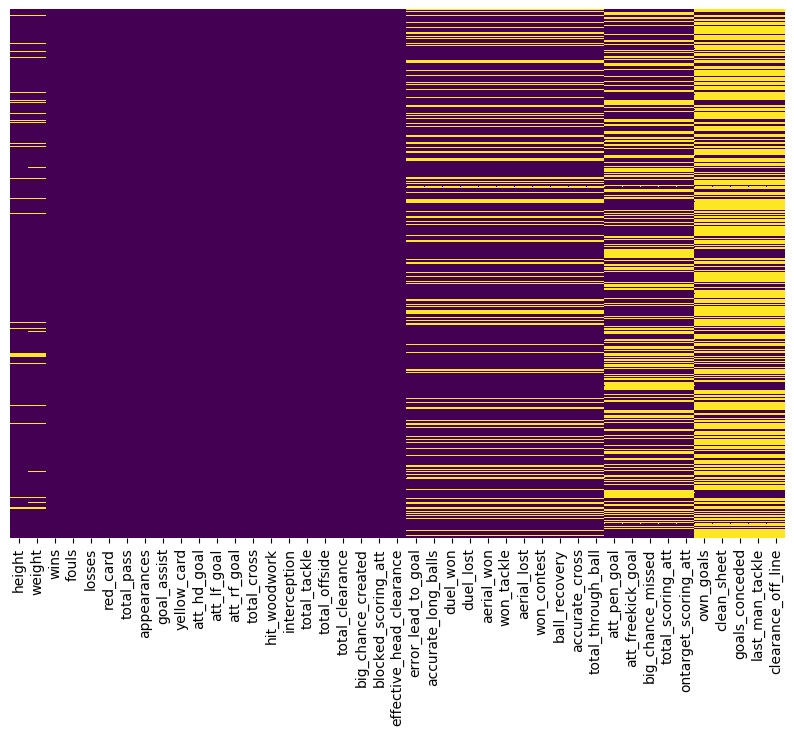

In [446]:
fig = plt.figure(figsize=(10,7), dpi=100)
sns.heatmap(outfield.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are only a few values missing for the height and weight of players. To fix this I'll replace the missing values with the average player height.

In [447]:
outfield['height'] = outfield['height'].fillna(outfield['height'].mean())
outfield['weight'] = outfield['weight'].fillna(outfield['weight'].mean())

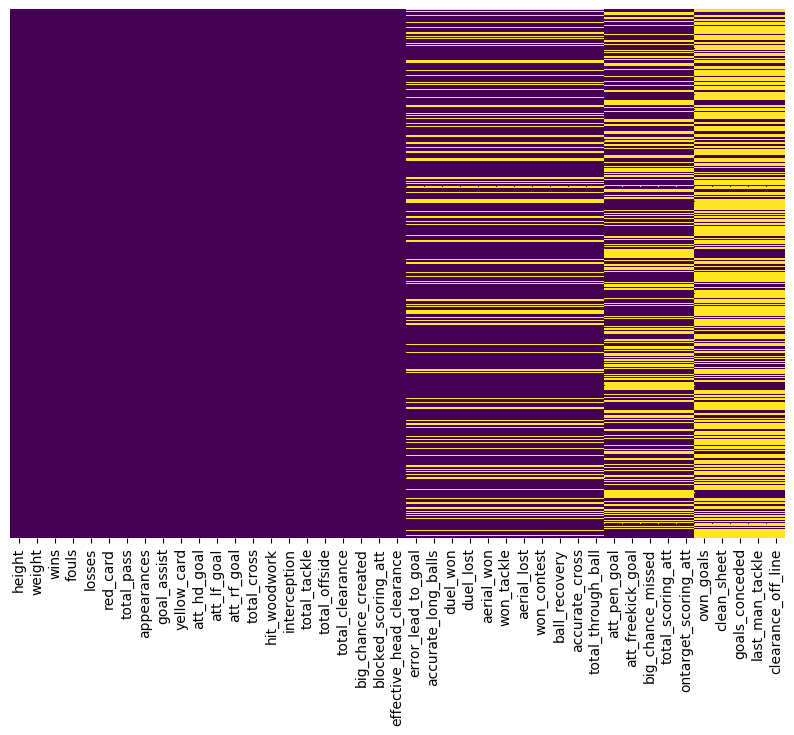

In [448]:
fig = plt.figure(figsize=(10,7), dpi=100)
sns.heatmap(outfield.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [449]:
outfield['clearance_off_line']

0      NaN
1      NaN
2      NaN
3      0.0
5      0.0
      ... 
561    NaN
562    NaN
563    NaN
564    NaN
565    NaN
Name: clearance_off_line, Length: 494, dtype: float64

We seem to be missing the majority of the data for the last 5 features. I don't think that inputting an average value for these columns nor zero would be a good choice since in my opinion that would be infering too much about a certain player, for example the likelyhood for an attacker to be the last man tackling the ball is far less than that of a defender so to input a value for both (since we don't know where each player plays) wouldn't be accurate.

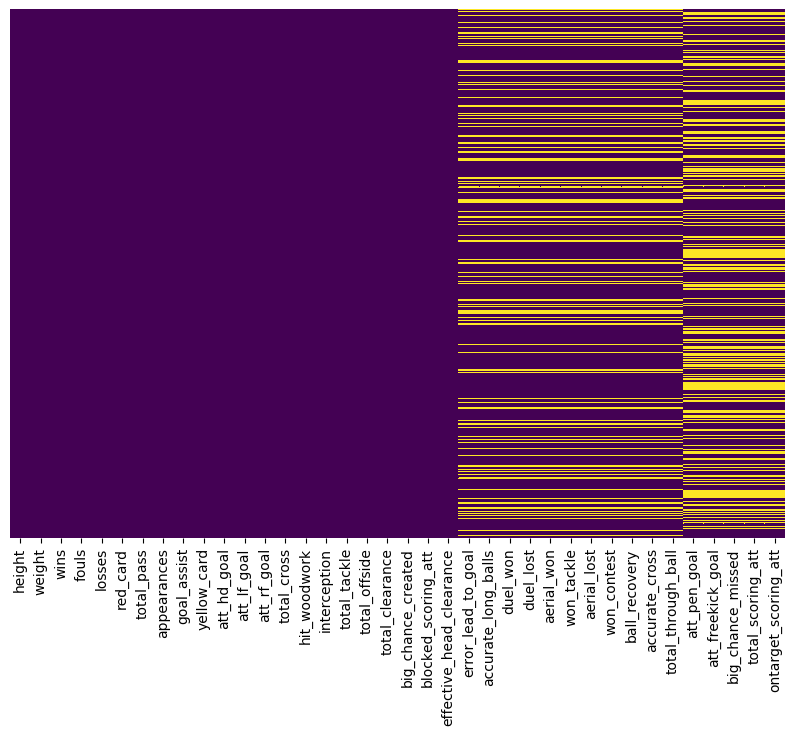

In [450]:
outfield = outfield.iloc[:,:-5]
fig = plt.figure(figsize=(10,7), dpi=100)
sns.heatmap(outfield.isna(),yticklabels=False,cbar=False,cmap='viridis')

These last features that still have some Nan values I will replace with zero 

In [493]:
outfield.fillna(0,inplace=True)

All of the data is now ready ot be used in sklearns KMeans clustering model.

In [494]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(outfield)
labels = pd.DataFrame(kmeans.labels_)

In [495]:
outfield_names = player.merge(outfield, left_index=True, right_index=True)

In [498]:
outfield_names = outfield_names.reset_index()
outfield_names.drop(['index'],axis=1,inplace=True)
compare = [outfield_names,labels]
compare = pd.concat(compare, axis=1)
#The dataframes of the statistics, player names, and labels will now be joined

In [500]:
compare = compare.rename({0:'Label'}, axis=1)

The model has now been trained and as a means to visualize the data I will use the top two principal components of the data and plot the players on a 2-D graph.

In [501]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(outfield)
X = pca.transform(outfield)
principals = pd.DataFrame(data=X,columns = ['Princ1', 'Princ2'])

In [502]:
finalDF = pd.concat([principals, compare['Label']],axis=1)

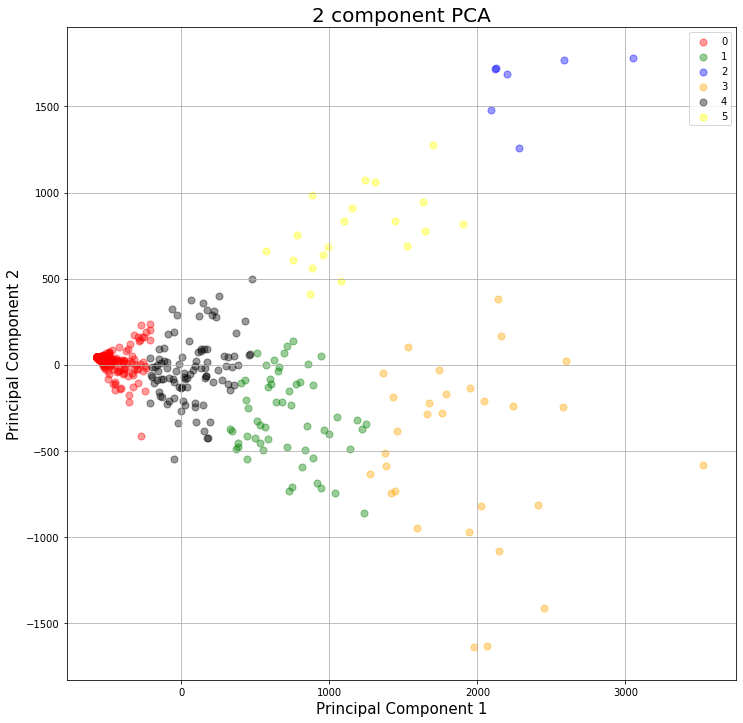

In [504]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4,5]
colors = ['red', 'green', 'blue','orange','black', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Label'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'Princ1']
               , finalDF.loc[indicesToKeep, 'Princ2']
               , c = color
               , s = 50,alpha=.4)
ax.legend(targets)
ax.grid()

Here we can see the actual clusters as represented by different colors.
Now to see whether our clusters have grouped the players by accurate position we will look through some of the clusters.

In [513]:
compare.loc[compare['Label']==0]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
0,3452,1990-11-26,Danny Welbeck,England,185.000000,73.000000,87.0,89.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,35.0,307.0,38.0,0
2,4805,1985-08-20,Álvaro Negredo,Spain,186.000000,86.000000,23.0,32.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,16.0,72.0,39.0,0
3,13194,1996-12-31,Jordan Lee,England,178.000000,80.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5514,1988-05-23,Angelo Ogbonna,Italy,191.000000,86.000000,13.0,22.0,8.0,0.0,...,8.0,135.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,8107,1996-04-06,Oliver McBurnie,England,181.339019,75.255914,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,9960,1994-01-19,Alfie Mawson,England,190.000000,81.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
487,7081,1988-10-09,Lucas Pérez,Spain,180.000000,73.000000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
489,19673,1997-06-27,Ramadan Sobhi,Egypt,183.000000,75.000000,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
491,13866,1999-04-24,Jonathan Leko,England,182.000000,75.000000,0.0,7.0,4.0,0.0,...,12.0,24.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0


This cluster seems to be made up of generally attacking players.

In [514]:
compare.loc[compare['Label']==1]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
14,2341,1987-11-29,Nathan Dyer,England,165.0,60.0,51.0,100.0,52.0,2.0,...,172.0,574.0,18.0,17.0,0.0,0.0,12.0,152.0,38.0,1
16,4084,1986-06-26,Jason Puncheon,England,173.0,70.0,48.0,154.0,64.0,1.0,...,219.0,907.0,28.0,43.0,1.0,3.0,13.0,292.0,34.0,1
19,4673,1987-07-18,Claudio Yacob,Argentina,181.0,77.0,37.0,199.0,42.0,1.0,...,24.0,625.0,31.0,1.0,0.0,0.0,1.0,47.0,19.0,1
36,4539,1992-10-11,Wilfried Zaha,England,180.0,66.0,25.0,101.0,38.0,0.0,...,275.0,417.0,21.0,7.0,0.0,0.0,9.0,91.0,34.0,1
54,4525,1992-12-06,Philippe Coutinho,Brazil,171.0,71.0,62.0,65.0,25.0,1.0,...,252.0,558.0,23.0,124.0,0.0,1.0,13.0,373.0,30.0,1
69,2686,1985-09-07,Ben Watson,England,178.0,68.0,33.0,121.0,65.0,1.0,...,27.0,544.0,29.0,17.0,4.0,1.0,4.0,99.0,35.0,1
81,4477,1984-12-13,Santiago Cazorla,Spain,168.0,66.0,77.0,67.0,24.0,1.0,...,265.0,859.0,24.0,128.0,8.0,0.0,8.0,313.0,36.0,1
89,4141,1985-10-11,Aleksandar Kolarov,Serbia,187.0,83.0,90.0,111.0,30.0,1.0,...,84.0,634.0,26.0,8.0,0.0,0.0,0.0,0.0,0.0,1
92,4821,1988-07-08,Erik Pieters,Netherlands,184.0,84.0,36.0,167.0,41.0,0.0,...,36.0,481.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,1
100,3983,1990-12-12,Victor Moses,Nigeria,177.0,75.0,62.0,118.0,56.0,0.0,...,274.0,499.0,22.0,15.0,1.0,0.0,19.0,246.0,27.0,1


Interestingly, in this cluster we can see generally wide players, both defenders and midfielders with a few central midfielders who are known as attacking minded players.

In [515]:
compare.loc[compare['Label']==2]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
71,3222,1982-08-17,Phil Jagielka,England,183.0,83.0,123.0,137.0,93.0,0.0,...,33.0,1399.0,30.0,11.0,0.0,0.0,0.0,0.0,0.0,2
149,3158,1987-04-10,Ryan Shawcross,England,191.0,76.0,82.0,271.0,105.0,5.0,...,35.0,646.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,2
224,2053,1984-08-18,Robert Huth,Germany,191.0,80.0,111.0,317.0,95.0,2.0,...,34.0,808.0,17.0,5.0,0.0,0.0,0.0,0.0,0.0,2
225,1353,1980-07-12,John Terry,England,187.0,90.0,306.0,202.0,74.0,6.0,...,23.0,1248.0,25.0,14.0,0.0,0.0,0.0,0.0,0.0,2
330,2620,1985-12-19,Gary Cahill,England,193.0,86.0,117.0,207.0,104.0,2.0,...,59.0,1134.0,17.0,5.0,0.0,0.0,0.0,0.0,0.0,2
345,2805,1983-11-18,Michael Dawson,England,188.0,76.0,108.0,179.0,82.0,3.0,...,12.0,645.0,40.0,5.0,0.0,0.0,0.0,0.0,0.0,2
439,3010,1983-08-23,James Collins,Wales,188.0,83.0,85.0,194.0,90.0,2.0,...,24.0,687.0,27.0,5.0,0.0,0.0,0.0,0.0,0.0,2


Perfect!
Here is a cluster of exclusively central defenders.

In [516]:
compare.loc[compare['Label']==3]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
13,1634,1981-07-28,Michael Carrick,England,188.0,74.0,254.0,164.0,111.0,0.0,...,77.0,1587.0,29.0,90.0,0.0,0.0,0.0,229.0,24.0,3
15,3360,1984-02-22,Branislav Ivanovic,Serbia,185.0,91.0,145.0,292.0,50.0,2.0,...,106.0,1154.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,3
28,2299,1984-01-13,Glenn Whelan,Ireland,180.0,79.0,87.0,256.0,97.0,1.0,...,56.0,1395.0,31.0,28.0,0.0,0.0,1.0,174.0,14.0,3
35,3712,1990-06-17,Jordan Henderson,England,182.0,67.0,107.0,197.0,71.0,1.0,...,100.0,1156.0,25.0,103.0,1.0,2.0,14.0,282.0,29.0,3
38,3285,1985-04-08,Antonio Valencia,Ecuador,181.0,83.0,144.0,354.0,70.0,3.0,...,361.0,1310.0,26.0,53.0,0.0,0.0,0.0,0.0,0.0,3
58,3062,1985-09-07,Ashley Young,England,180.0,65.0,131.0,308.0,73.0,1.0,...,254.0,1039.0,22.0,102.0,5.0,5.0,22.0,499.0,33.0,3
63,2148,1984-08-23,Glen Johnson,England,178.0,70.0,160.0,234.0,90.0,1.0,...,466.0,1434.0,18.0,49.0,0.0,0.0,0.0,0.0,0.0,3
67,2413,1985-07-26,Gaël Clichy,France,176.0,65.0,185.0,211.0,45.0,1.0,...,256.0,1537.0,20.0,32.0,0.0,0.0,0.0,0.0,0.0,3
73,4081,1985-10-12,Charlie Adam,Scotland,185.0,83.0,56.0,287.0,70.0,3.0,...,144.0,890.0,22.0,54.0,10.0,2.0,5.0,364.0,28.0,3
76,3311,1983-02-14,Bacary Sagna,France,176.0,72.0,142.0,158.0,47.0,1.0,...,89.0,1133.0,19.0,17.0,0.0,0.0,0.0,0.0,0.0,3


This cluster is made up of mostly wide defenders and defensive midfielders.

In [517]:
compare.loc[compare['Label']==4]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
1,5001,1994-12-01,Emre Can,Germany,184.0,82.0,29.0,68.0,16.0,1.0,...,74.0,358.0,8.0,8.0,0.0,0.0,0.0,47.0,36.0,4
7,4788,1985-02-10,George Boyd,Scotland,186.0,79.0,17.0,65.0,37.0,0.0,...,51.0,264.0,28.0,4.0,0.0,0.0,3.0,81.0,30.0,4
21,5344,1987-07-25,Fernando,Brazil,183.0,76.0,29.0,57.0,11.0,0.0,...,24.0,247.0,100.0,1.0,0.0,0.0,6.0,25.0,28.0,4
24,6047,1987-01-23,Joe Ledley,Wales,183.0,73.0,28.0,35.0,26.0,0.0,...,22.0,332.0,18.0,0.0,0.0,0.0,2.0,32.0,31.0,4
29,4438,1987-03-24,Billy Jones,England,183.0,77.0,29.0,109.0,46.0,0.0,...,67.0,348.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,3714,1989-05-29,David Meyler,Ireland,189.0,81.0,25.0,98.0,40.0,2.0,...,24.0,386.0,18.0,7.0,0.0,0.0,1.0,40.0,23.0,4
480,4546,1985-07-28,Mathieu Debuchy,France,177.0,76.0,22.0,87.0,22.0,2.0,...,28.0,242.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,4
486,13492,1991-03-29,N'Golo Kanté,France,169.0,68.0,27.0,55.0,5.0,0.0,...,55.0,393.0,29.0,7.0,0.0,0.0,1.0,31.0,19.0,4
490,4112,1994-01-15,Eric Dier,England,188.0,88.0,36.0,76.0,15.0,0.0,...,31.0,271.0,20.0,6.0,0.0,0.0,2.0,48.0,19.0,4


This cluster is made up of mostly defensive midfielders.

In [518]:
compare.loc[compare['Label']==5]

,id,dob,name,nationality,height,weight,wins,fouls,losses,red_card,...,won_contest,ball_recovery,accurate_cross,total_through_ball,att_pen_goal,att_freekick_goal,big_chance_missed,total_scoring_att,ontarget_scoring_att,Label
5,1717,1981-04-30,John O'Shea,Ireland,191.0,75.0,214.0,187.0,105.0,1.0,...,28.0,913.0,23.0,16.0,0.0,0.0,0.0,0.0,0.0,5
47,4246,1984-09-29,Per Mertesacker,Germany,198.0,90.0,85.0,48.0,30.0,2.0,...,16.0,722.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,5
108,3820,1992-02-21,Phil Jones,England,185.0,72.0,72.0,125.0,33.0,0.0,...,59.0,536.0,21.0,13.0,0.0,0.0,0.0,0.0,0.0,5
114,1911,1981-07-20,Damien Delaney,Ireland,191.0,89.0,37.0,71.0,53.0,1.0,...,8.0,377.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,5
116,4403,1984-08-23,Ashley Williams,Wales,183.0,77.0,62.0,173.0,73.0,0.0,...,22.0,847.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,5
121,3613,1989-11-22,Chris Smalling,England,192.0,81.0,85.0,139.0,38.0,1.0,...,54.0,640.0,35.0,6.0,0.0,0.0,0.0,0.0,0.0,5
127,3517,1989-03-29,James Tomkins,England,191.0,74.0,53.0,107.0,73.0,2.0,...,14.0,592.0,33.0,3.0,0.0,0.0,0.0,0.0,0.0,5
220,3156,1988-03-01,Jonny Evans,Northern Ireland,188.0,77.0,108.0,138.0,38.0,2.0,...,54.0,946.0,35.0,8.0,0.0,0.0,0.0,0.0,0.0,5
255,3653,1986-10-04,Vincent Kompany,Belgium,190.0,85.0,131.0,267.0,46.0,3.0,...,90.0,1254.0,24.0,28.0,0.0,0.0,0.0,0.0,0.0,5
259,3807,1987-02-14,Scott Dann,England,188.0,76.0,53.0,114.0,66.0,0.0,...,31.0,542.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,5


Interestingly this cluster too is made up of entirely central defenders like cluster 2

# Conclusion

We were able to find our goalkeepers easily from the early data exploration we did visually via the help of a heatmap.
After cleaning the rest of our data we were able to then find the 6 remaining clusters. Our clusters found attack minded and defensive minded payers. Two of out clusters were able to correctly find exclusivily central defenders. The other clusters however succeeded in grouping attack minded players together and defensive minded players together. 
Althought the clusters weren't made exaclty how I had thought they might, it was interesting to see how the model made groups of players it thought were similar. 